In [1]:
import os
import mdtraj as md
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)
dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and

/tmp/ipykernel_30773/2569745601.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


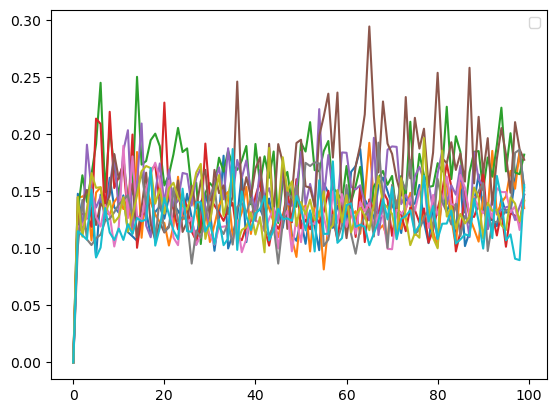

In [2]:
def analysis(traj_files, top_file, slice_step=1):
    for i, traj_file in enumerate(traj_files):
        traj = md.load(traj_file, top=top_file)[::slice_step]
        traj.image_molecules(inplace=True)
        protein_atoms = traj.topology.select('protein and name CA')
        traj.superpose(traj, frame=0, atom_indices=protein_atoms)
        ligand_atoms = traj.topology.select('resname UNK')
        result = traj.xyz[:, ligand_atoms, :] - traj.xyz[0, ligand_atoms, :]
        ligand_rmsd = np.sqrt((result ** 2).sum(axis=-1).mean(axis=-1))
        plt.plot(ligand_rmsd)
        #plt.show()
        #plt.close()
        traj.save(f'rep{i}_processed.xtc')


analysis(['rep_' + str(i) + '/trj.dcd' for i in range(10)], 'minimized_system.pdb')
plt.legend()
plt.show()

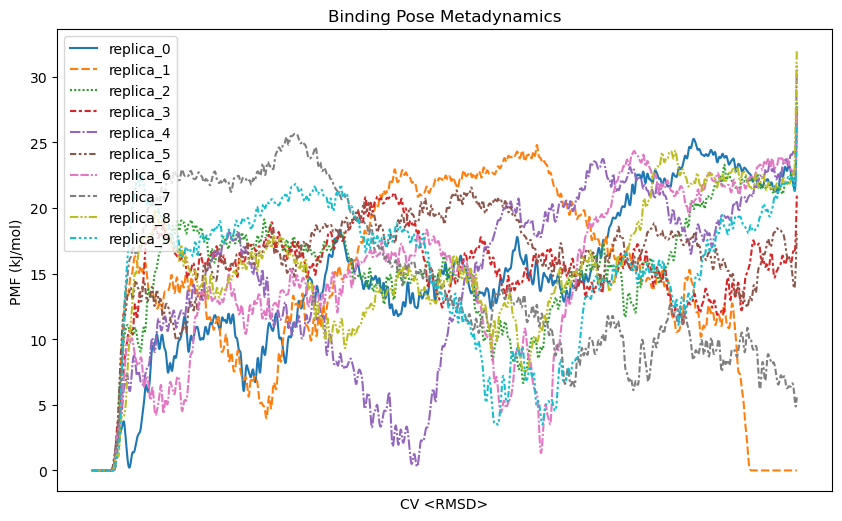

In [3]:
import glob

pmf_df = None
for i in range(10):
    files = glob.glob(os.path.join(f'rep_{i}', 'bias_*.npy'))
    if not files:
        print(f"No bias file found for rep_{i}")
        continue
    pmf = np.load(files[0]).squeeze()
    df = pd.DataFrame(pmf, columns=[f'replica_{i}'])
    if pmf_df is None:
        pmf_df = df
    else:
        pmf_df = pd.concat([pmf_df, df], axis=1)

plt.figure(figsize=(10, 6))
sns.lineplot(data=pmf_df)
plt.title("Binding Pose Metadynamics")
plt.xlabel("CV <RMSD>")
plt.xticks([])
plt.ylabel("PMF (kJ/mol)")
plt.legend()
plt.show()